In [1]:
#This cell is for importing necessary libraries and modules.


import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import sklearn as sk

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from time import time
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore")


In [2]:
#In this cell, I am using pandas to load a saved file
#Please change the file directory

df = pd.read_csv('/Users/brianoh/school_Project/github_uploaded/4404/P1/penguins_size.csv')


In [3]:
#To check if the data file was imported propertly

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
#To check if the data file was imported propertly

df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [5]:
#Once I confirm that the file is imported properly,
#I would like to see overview of the data so that
#I can check what types of data in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#To see the number of tuples and columns of the dataset.
df.shape

(344, 7)

In [7]:
#To see the summary of centural tendency and data distribution
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
#Now, I also wants to know if there are any missing values that could
#effect the quality of the dataset 
df.isnull().sum()
#After perform this, we know that there are missing values.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
#Since we know that, there are missing values.
#I would like to drop tuples those have more than 4 values are missing.
#Total number of columns = 7 and 4 is over 50%. 
#Thus, if any tuple that has more than 50% of missing values then drop that tuple.
#After that, I will save the dataset into new dataset called 
#'new_df'

#Some could argue that dropping tuples could be losses of the dataset.
#However, we are only removing the tuples that has more than 3 values are missing. 
#Therefore, this will have positive effect and also it only
#removes 2 tuples out of 344 tuples.

new_df = df.dropna(thresh = 4)
new_df


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
#After the dropna is performed,
#I would like to know how many tuples were dropped.
#Though it says in the previous cell, I would like to double check


new_df.shape

(342, 7)

In [11]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [12]:
#Now we know that there are only sex column has missing values.
#Thus, I want to know unique values in the column. 
new_df.sex.unique()
#I learned that in the dataset, there are three different unique values in sex
#'MALE', 'FEMALE', '.'. I considered nan as not a unique value since we will eventually
#replace them as either 'MALE' or 'FEMALE'.
#I acknowledge that there are more than 2 sex. We will tranform nan and . into Male or Female
#to ease the analysis of the data

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [13]:
new_df.pivot_table('species', index = 'sex', aggfunc= 'count')
#Since we know that there are three different unique values,
#I would like to know how many tuples in each unique value.
#And we learned that there is one '.' sex.


,species
sex,
.,1
FEMALE,165
MALE,168


In [14]:
new_df.loc[new_df['sex'] == '.']
#Since there is only one '.', I want to know the exact info of the tuple.
#So that I can determine the details of the tuple
#After that, I want to find out the means of 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
new_df.pivot_table(index = 'species', columns = 'sex'
                   ,aggfunc = 'mean')

#With this pivot_table, I would like to see the average of each continuous data
#columns such as body_mass_g, culmen_depth_mm, culmen_length_mm, and flipper_length_mm

body_mass_g                           culmen_depth_mm             \
sex                 .       FEMALE         MALE               .     FEMALE   
species                                                                      
Adelie            NaN  3368.835616  4043.493151             NaN  17.621918   
Chinstrap         NaN  3527.205882  3938.970588             NaN  17.588235   
Gentoo         4875.0  4679.741379  5484.836066            15.7  14.237931   

                     culmen_length_mm                       flipper_length_mm  \
sex             MALE                .     FEMALE       MALE                 .   
species                                                                         
Adelie     19.072603              NaN  37.257534  40.390411               NaN   
Chinstrap  19.252941              NaN  46.573529  51.094118               NaN   
Gentoo     15.718033             44.5  45.563793  49.473770             217.0   

                                   
sex            FEMALE        MALE  
species                            
Adelie     187.794521  192.410959  
Chinstrap  191.735294  199.911765  
Gentoo     212.706897  221.540984

In [16]:
#With this pivot_table, I would like to see the average of each continuous data
#columns such as body_mass_g, culmen_depth_mm, culmen_length_mm, and flipper_length_mm
#And then, save that into sex_pivot table for later comparison

sex_pivot = new_df.pivot_table(index = 'species', columns = 'sex'
                   ,aggfunc = 'mean')
sex_pivot

body_mass_g                           culmen_depth_mm             \
sex                 .       FEMALE         MALE               .     FEMALE   
species                                                                      
Adelie            NaN  3368.835616  4043.493151             NaN  17.621918   
Chinstrap         NaN  3527.205882  3938.970588             NaN  17.588235   
Gentoo         4875.0  4679.741379  5484.836066            15.7  14.237931   

                     culmen_length_mm                       flipper_length_mm  \
sex             MALE                .     FEMALE       MALE                 .   
species                                                                         
Adelie     19.072603              NaN  37.257534  40.390411               NaN   
Chinstrap  19.252941              NaN  46.573529  51.094118               NaN   
Gentoo     15.718033             44.5  45.563793  49.473770             217.0   

                                   
sex            FEMALE        MALE  
species                            
Adelie     187.794521  192.410959  
Chinstrap  191.735294  199.911765  
Gentoo     212.706897  221.540984

In [17]:
#Since we know that only the specie Gentoo has '.' sex value,
#I would like to seperate the Gentoo row for more detailed comparison


sex_pivot_gentoo = sex_pivot.loc['Gentoo']
sex_pivot_gentoo

                   sex   
body_mass_g        .         4875.000000
                   FEMALE    4679.741379
                   MALE      5484.836066
culmen_depth_mm    .           15.700000
                   FEMALE      14.237931
                   MALE        15.718033
culmen_length_mm   .           44.500000
                   FEMALE      45.563793
                   MALE        49.473770
flipper_length_mm  .          217.000000
                   FEMALE     212.706897
                   MALE       221.540984
Name: Gentoo, dtype: float64

In [18]:
sex_pivot_gentoo = sex_pivot_gentoo.unstack()

In [19]:
#With sex_pivot_gentoo table, we will find out whether that specific row(with '.' sex)
#is closer to 'MALE' or 'FEMALE' by coming the sizes of each features.

sex_pivot_gentoo['DiffF'] = (sex_pivot_gentoo['FEMALE'] - sex_pivot_gentoo['.']).abs()

sex_pivot_gentoo['DiffM'] = (sex_pivot_gentoo['MALE'] - sex_pivot_gentoo['.']).abs()

Final_Sex_Pivot_gentoo = sex_pivot_gentoo


In [20]:
Final_Sex_Pivot_gentoo

#As you can see in the pivot table, Final_Sex_Pivot_gentoo, it shows that
#Body_mass_g, culmen_length_mm, and flipper_length_mm has smaller differences.
#Therefore, I considered the penguin as a 'FEMALE'

#After the examination, it is better to be considered as a Female
#Because of the the diff

sex,.,FEMALE,MALE,DiffF,DiffM
body_mass_g,4875.0,4679.741379,5484.836066,195.258621,609.836066
culmen_depth_mm,15.7,14.237931,15.718033,1.462069,0.018033
culmen_length_mm,44.5,45.563793,49.473770,1.063793,4.973770
flipper_length_mm,217.0,212.706897,221.540984,4.293103,4.540984


In [21]:
#Due to the previous decision, we will replace its sex '.' to 'FEMALE'
new_data2 = new_df.replace(['.'],'FEMALE')

In [22]:
#Check if the replacement were performed as intended
new_data2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [23]:
#After the replacement is done,
#I want to check the unique values in the 'sex' column

new_data2['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [24]:
new_data2.pivot_table(columns = 'species', index = 'sex', values = 'island', aggfunc = 'count')

#In this pivot table, I learned that sex ratio of each specie(Male : Female)
#Adelie 50:50
#Chinstrap 50:50
#Gentoo 51:49

species,Adelie,Chinstrap,Gentoo
sex,,,
FEMALE,73,34,59
MALE,73,34,61


In [25]:
new_data2[new_data2['sex'].isnull()]
#In this table, there are two different species,
#As per previous cell, we can utilize the ratio of sex.
#Since the ration of sex is similar enough, there are not speicific effct

#Due to the size and 

#In Adelie, cell 9 and 11 is approriate to be a male and
#cell 8, 10, and 47 is approriate to be a female
#In Gentoo, cell 286 and 324 is approriate to be a male
#cell 246 is approriate to be a female

#Becase we know that male penguins tend to be bigger than female penguins.


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [26]:
#Since it is not many rows that needed to be changed,
#we will perform manually.
new_data2.loc[8:8,'sex'] = 'FEMALE'
new_data2.loc[9:9,'sex'] = 'MALE'
new_data2.loc[10:10,'sex'] = 'FEMALE'
new_data2.loc[11:11,'sex'] = 'MALE'
new_data2.loc[47:47,'sex'] = 'FEMALE'

new_data2.loc[246:246,'sex'] = 'FEMALE'
new_data2.loc[286:286,'sex'] = 'MALE'
new_data2.loc[324:324,'sex'] = 'MALE'

In [27]:
new_data2[new_data2['sex'].isnull()]

#now we know that all null values are treated as we intened.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [28]:
new_data2.isnull().sum()
#Now we know that there is no null value in the dataset

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
new_data2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [30]:
new_data2.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [31]:
#Now, we know that there are only two unique values; MALE and FEMALE
new_data2['sex'].unique()


array(['MALE', 'FEMALE'], dtype=object)

In [32]:
#After removing the tuples that have more than 3 missing values,
#there are still tuples that has missing values in the sex column.

#In the case of 8 missing values in sex column, the dataset tells that
#sex is the only missing values in the dataset.
#Therefore, it is inappropriate to remove the tuples with miss sex values.

#Instead, I would like to firstly change the value to
#male = 0 and female = 1

gender_val = {'MALE' : 0, 'FEMALE' : 1}
new_data2['sex'] = new_data2['sex'].map(gender_val)
new_data2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [33]:
new_data2.sex.unique()
#now we know there are no missing values.
#also we know that it is constist of either 0(male) or 1(female)

array([0, 1])

In [34]:
#our final dataset is 
#new_data2

In [35]:
# new_data2.pivot_table(columns = 'species', index = 'sex', values = 'island', aggfunc = 'count')
new_data2.pivot_table(columns = 'species', index = 'island', values = 'sex', aggfunc = 'count')

#This pivot table shows that the data were collected in three differnt islands; Biscoe, Dream, and Torgersen.
#we will transform the islands into a numerical data to acheieve ease of handling the dataset

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44.0,NaN,123.0
Dream,56.0,68.0,NaN
Torgersen,51.0,NaN,NaN


In [36]:
#Like the sex column, we will tranform the island column into the following;
#Biscoe = 0, Dream = 1, and Torgersen = 2

island_val = {'Biscoe' : 0, 'Dream' : 1, 'Torgersen' : 2}
new_data2['island'] = new_data2['island'].map(island_val)
new_data2


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,0
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,1
340,Gentoo,0,46.8,14.3,215.0,4850.0,1
341,Gentoo,0,50.4,15.7,222.0,5750.0,0
342,Gentoo,0,45.2,14.8,212.0,5200.0,1


Upto this point, I have filled the missing values or removed the tuples that would lower the quality of the data such as tuple that has too many missing values.

After this point, I would like to see the shape of data so that I would be able to see how the data shape forms.


In [37]:
#Since we are trying to detrmine, spcies of penguin, I would like to 
#group the dataset by species.
penguin_groups  = new_data2.groupby('species')

In [38]:
#After that, I want to see max, min, mean and standard deviation to grasp 
#the data shape and
penguin_groups.max()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,2,46.0,21.5,210.0,4775.0,1
Chinstrap,1,58.0,20.8,212.0,4800.0,1
Gentoo,0,59.6,17.3,231.0,6300.0,1


In [39]:
penguin_groups.min()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,0,32.1,15.5,172.0,2850.0,0
Chinstrap,1,40.9,16.4,178.0,2700.0,0
Gentoo,0,40.9,13.1,203.0,3950.0,0


In [40]:
penguin_groups.mean()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,1.046358,38.791391,18.346358,189.953642,3700.662252,0.503311
Chinstrap,1.000000,48.833824,18.420588,195.823529,3733.088235,0.500000
Gentoo,0.000000,47.504878,14.982114,217.186992,5076.016260,0.487805


In [41]:
penguin_groups.std()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,0.794462,2.663405,1.216650,6.539457,458.566126,0.501653
Chinstrap,0.000000,3.339256,1.135395,7.131894,384.335081,0.503718
Gentoo,0.000000,3.081857,0.981220,6.484976,504.116237,0.501896


<Figure size 432x288 with 0 Axes>

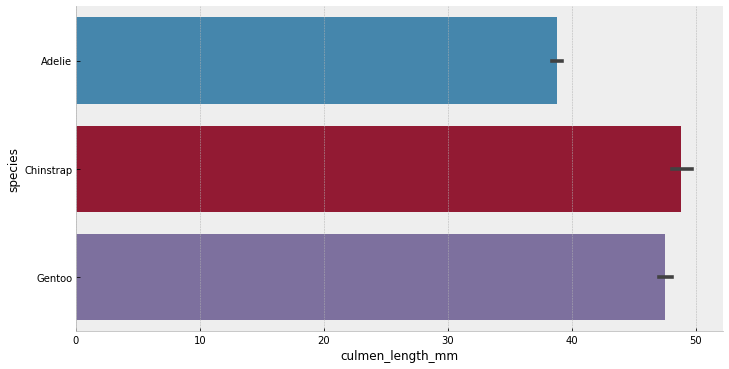

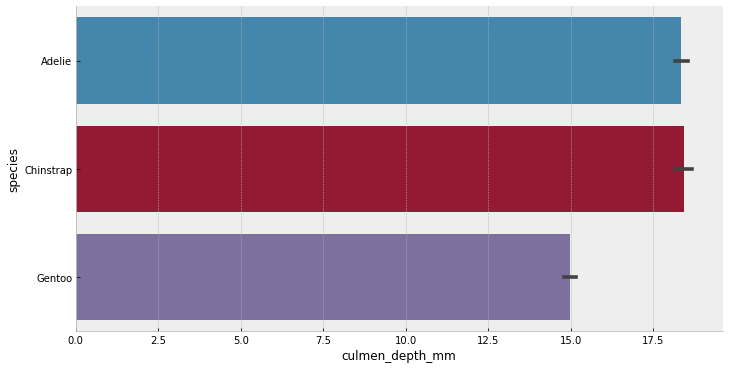

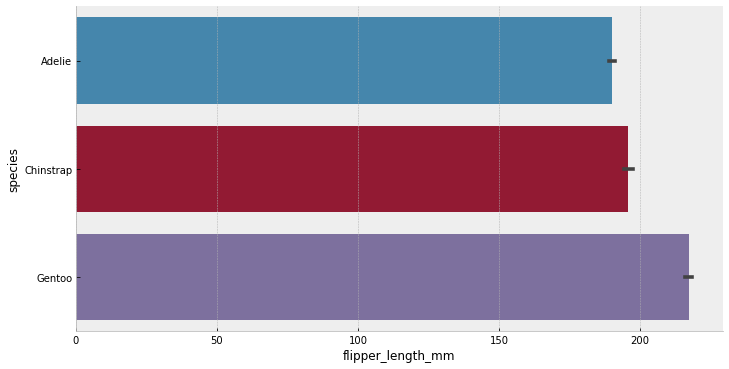

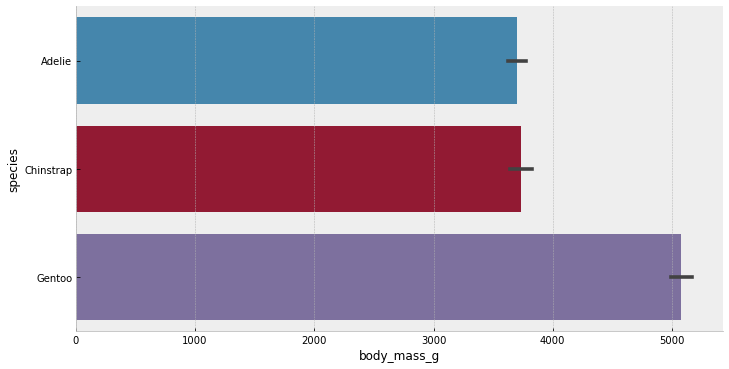

In [42]:
for i, col in enumerate(['culmen_length_mm', 'culmen_depth_mm',
                         'flipper_length_mm', 'body_mass_g']):
    plt.figure(i)
    sns.catplot(x = col, y = 'species', data = new_data2,
                kind = 'bar', aspect = 2)
    
    
    
    
#In this graph, we can see differences of each specie's average culmen_length, culmen_depth,
#flipper_length, and body_mass.

#Our goal is to determine specie of penguin, it is important to see the differences between
#species. I have created tables to see the numbers in previous cells.
#I still want to see see with bar graphs where it has better visualization

This part I wanted to see the correlations of each columns to see relationships of each columns. This will help me to see column(s) that would play important part(s) and which column(s) depend(s) on which column(s). 


In [43]:
correlation_peng = new_data2.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

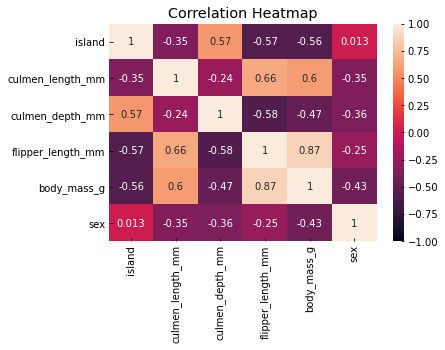

In [44]:
hm = sns.heatmap(correlation_peng, vmin = -1, vmax = 1, annot =True)

hm.set_title('Correlation Heatmap' )

#In this case, you can see 
# 1) flipper_length and body_mass is highly correlated.
# 2) culmen_length and flipper_length is highly correlated.
# 3) culmen_length and body_mass is correlated.
# All these three correlations make sense that physical features directly correlated to
# body weight.
# 4) island and culmen_depth is also correlated. However, this one needs more investigation

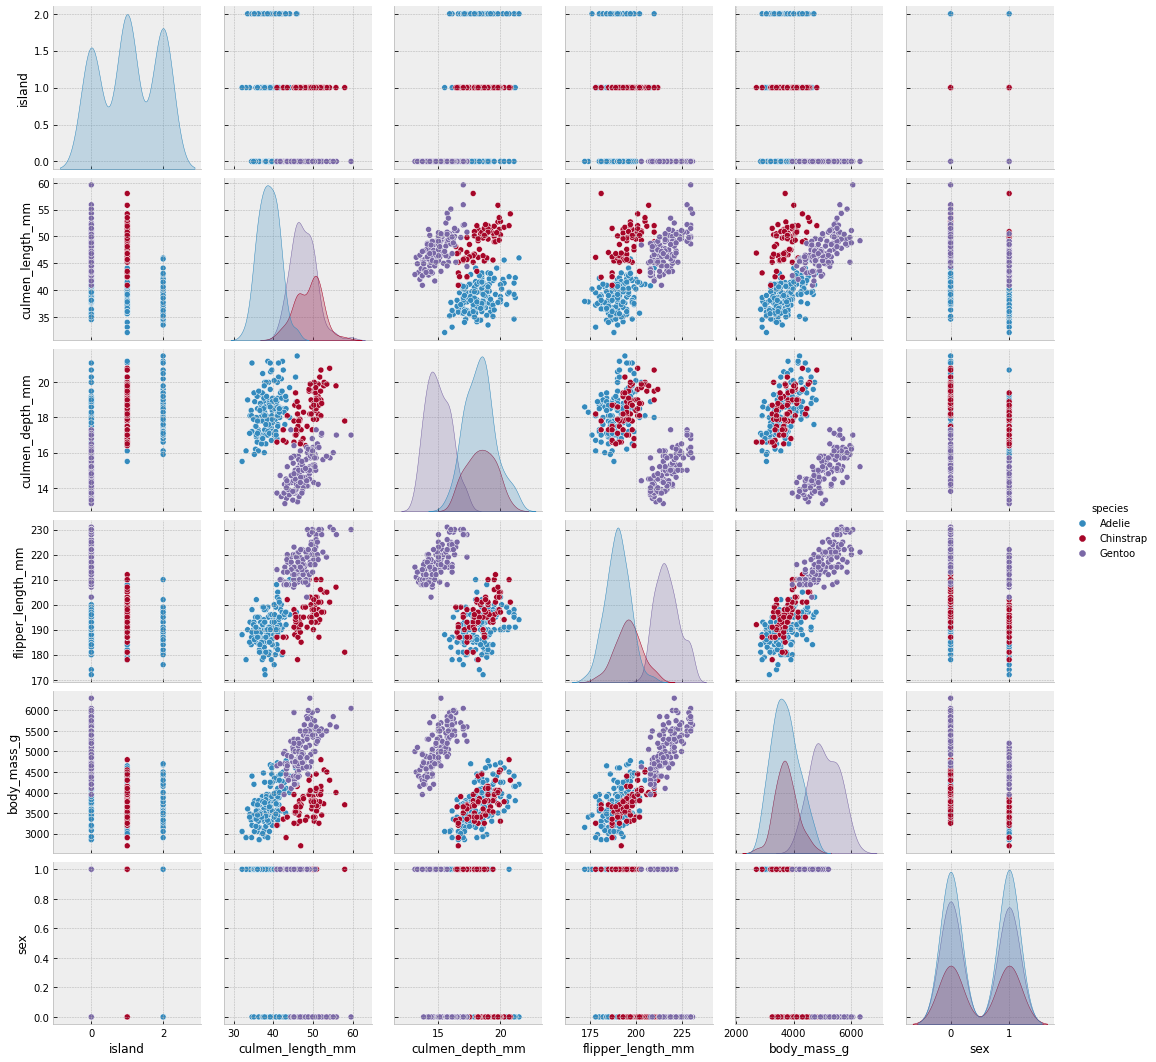

In [45]:
sns.pairplot(new_data2, hue = 'species')

#In this part, I want to see distribution of each columns and relationship between 
#two variables.


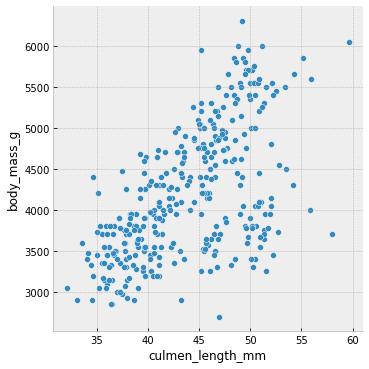

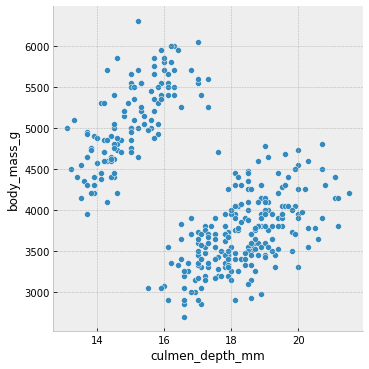

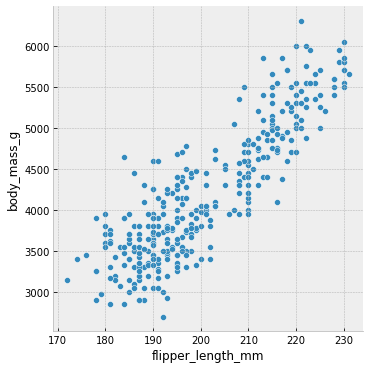

In [46]:
#In this section, I will plot three graphs to demonstrate relationships bettwen
#1) culmen_length and body_mass
#2) culmen_depth and body_mass
#3) flipper_length and body_mass
#Based on these graphs, 1) and 3) graph shows there are linear relationships
#1) culmen_length and body_mass, as culmen_length gets longer, body_mass gets heavier
#3) flipper_length and body_mass, as flipper_length gets longer, body_mass gets heavier

#2) culmen_depth and body_mass, it seems there is a relationship.
#However, further investigation is necessary to make a judgement. 


sns.relplot(data = new_data2, x = 'culmen_length_mm', y = 'body_mass_g')
sns.relplot(data = new_data2, x = 'culmen_depth_mm', y = 'body_mass_g')
sns.relplot(data = new_data2, x = 'flipper_length_mm', y = 'body_mass_g')

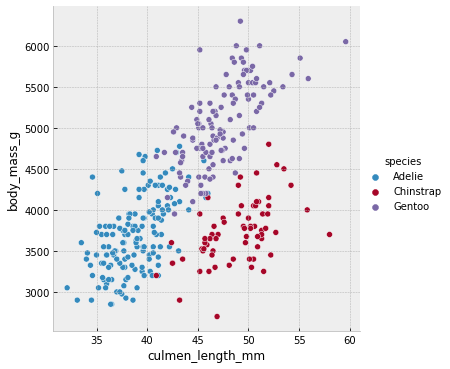

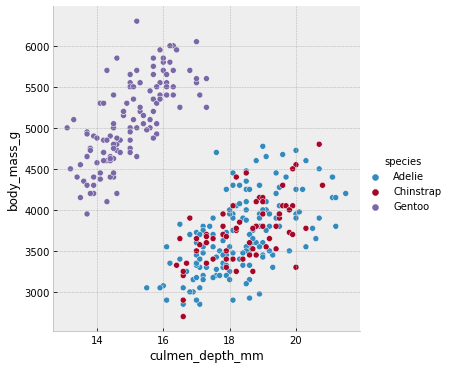

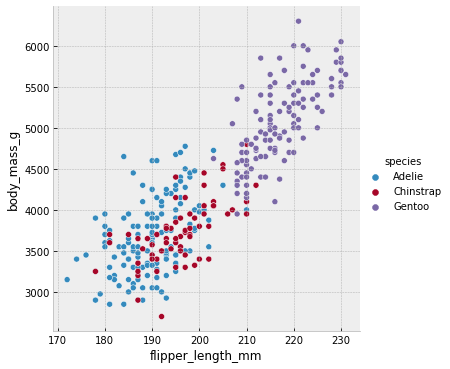

In [47]:
#Based on previous plot, I would also want to separate them into species.
#1) culmen_length and body_mass
#2) culmen_depth and body_mass
#3) flipper_length and body_mass

#In 2)culmen_depth and body_mass, after the further investigation, we can conclude that
#there is there is a linear relationship. It was not clearn in the previous plot.
#However, when I separated them species. I can clearly see that happened due to species differences.

sns.relplot(data = new_data2, x = 'culmen_length_mm', y = 'body_mass_g', hue = 'species')
sns.relplot(data = new_data2, x = 'culmen_depth_mm', y = 'body_mass_g',hue = 'species')
sns.relplot(data = new_data2, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species')

Text(0.5, 0, 'Test')

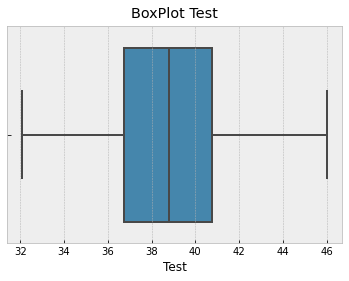

In [48]:
#Since we need to determine the species, Boxplot

# ax.axes.set_title("Box Plot of People's Resting Heart Rate", fontsize=20, y=1.01)
# plt.xlabel("pulse [beats per minute]", labelpad=14);

ax = sns.boxplot(x = new_data2[new_data2['species'] == 'Adelie']['culmen_length_mm'])
ax.axes.set_title("BoxPlot Test", y = 1.01)
plt.xlabel('Test')

In [49]:
new_data2['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Text(0.5, 1.0, 'To see distribution of culmen_length')

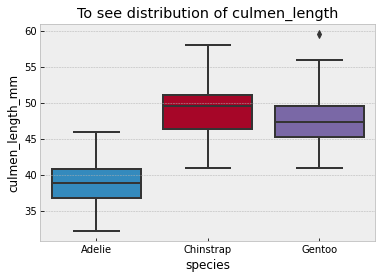

In [50]:
#I wanted to see how Culmen length can be vary with in different species.
#Also, boxplot will demonstrate the its the population distribution and 
#skewness of the whole sample.
#Though, I could display the all features, it does not display due to its scales.
#Thus, I separated into different boxplots.


boxplot_species_CL = sns.boxplot(x = 'species', y = 'culmen_length_mm', data = new_data2, saturation = 1)
boxplot_species_CL.axes.set_title("To see distribution of culmen_length")

#In the first Boxplot, we can see the median of each species.
#Chinstrap has the biggest, however Gentoo is still pretty big compare to Adelie.
#Gentoo has a outlier.





Text(0.5, 1.0, 'To see distribution of culmen_depth')

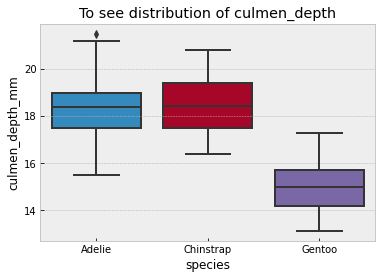

In [51]:
#There is a outliner in Adelie, however it is just one.
#Thus, it won't effect too much on the dataset.

boxplot_species_CD = sns.boxplot(x = 'species', y = 'culmen_depth_mm', data = new_data2, saturation =1)
boxplot_species_CD.axes.set_title("To see distribution of culmen_depth")


Text(0.5, 1.0, 'To see distribution of flipper_length')

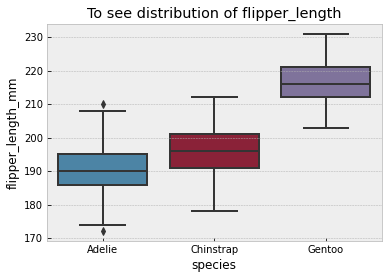

In [52]:
#There is a outliner in Adelie, however, there are only two.
#Thus, the effct won't be significant.


boxplot_species_FL = sns.boxplot(x = 'species', y = 'flipper_length_mm', data = new_data2, saturation = 0.65)
boxplot_species_FL.axes.set_title("To see distribution of flipper_length")



Text(0.5, 1.0, 'To see distribution of body_mass')

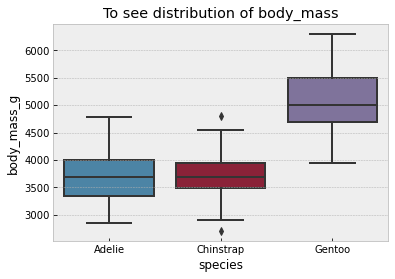

In [53]:
#There is a outliner in Adelie, however, there are only two.
#Thus, the effct won't be significant.

boxplot_species_BM = sns.boxplot(x = 'species', y = 'body_mass_g', data = new_data2, saturation = 0.65)
boxplot_species_BM.axes.set_title("To see distribution of body_mass")


# Features and Lables 

In [54]:
#The datasetw we will be using for the training

features = new_data2.drop('species', axis = 1)
labels = new_data2['species']

## Dataset seperation

This part to seperate the dataset into

>i) 60-20-20

>ii) 80-10-10


### 60-20-20 Dataset

In [55]:
#In this cell, we are performing 60-20-20 dataset split

X_train622,X_test622,y_train622, y_test622 = train_test_split(features, labels, 
                                                   test_size = 0.4,
                                                   random_state = 42)

X_test622, X_val622, y_test622, y_val622 = train_test_split(X_test622, y_test622, 
                                                test_size = 0.5,
                                               random_state = 42)



In [56]:
#Verification of seperation

print("The total datset is {}".format(len(new_data2)))
for dataset in [y_train622, y_val622, y_test622]:
    print(round(len(dataset) / len(labels),2))
    print(len(dataset))

The total datset is 342
0.6
205
0.2
69
0.2
68


### 80-10-10 Dataset

In [57]:
#In this cell, we are performing 60-20-20 dataset split

X_train811,X_test811,y_train811, y_test811 = train_test_split(features, labels, 
                                                   test_size = 0.2,
                                                   random_state = 42)

X_test811, X_val811, y_test811, y_val811 = train_test_split(X_test811, y_test811, 
                                                test_size = 0.5,
                                               random_state = 42)

In [58]:
#Verification of seperation

print("The total datset is {}".format(len(new_data2)))
for dataset in [y_train811, y_val811, y_test811]:
    print(round(len(dataset) / len(labels),2))
    print(len(dataset))

The total datset is 342
0.8
273
0.1
35
0.1
34


### Parameter printer to see the best result.

In [59]:
#this function prints the parameters and the best of score of the model

def print_results(results):
    print('BEST PARAMS: {}, Best Score: {}\n'.format(results.best_params_, results.best_score_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Function to plot a graph

In [60]:
#This graph plotting 

def plot_graph(title,train_size, train_score, test_score):

    train_scores_mean = np.mean(train_score, axis = 1)
    train_scores_std = np.std(train_score, axis = 1)
    test_scores_mean = np.mean(test_score, axis = 1)
    test_scores_std = np.std(test_score, axis = 1)


    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
        
    plt.title(title, fontsize = 24)
    plt.xlabel("Training size examples")
    plt.ylabel("Score")

    plt.fill_between(
        train_size,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha = 0.1,
        color = "r"
    )

    plt.fill_between(
        train_size,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha = 0.1,
        color = "g"
    )


    plt.plot(
            train_size, train_scores_mean, "o-", color="r", label="Training score"
        )
    plt.plot(
            train_size, test_scores_mean, "o-", color="g", label="Cross-validation score"
        )
    
    plt.legend(loc = 'best')
    
    
    
    
    
    

### Function to Evaluate models

In [61]:
#This model will evaluate Precision score, Recall score, and accuracy score
def performance_evaluation(model_name, model, features, labels):
    prediction = model.predict(features)
    
    precision = round(precision_score(labels, prediction, average = 'micro'), 3)
    recall = round(recall_score(labels, prediction, average = 'micro'), 3)
    accuracy = round(accuracy_score(labels, prediction), 3)
    
    print("{} model performance are the follwoing".format(model_name))
    print("Precision score is {}".format(precision))
    print("Recall score is {}".format(recall))
    print("Accuracy score is {}".format(accuracy))

## 1. Support Vector Machines with 60-20-20 dataset

### Support Vector Machine Model Train

In [62]:
SVC_622 = SVC()

parameters_SVM = {
    'kernel' : ['linear', 'rbf'],
    'C' : range(2,10),
    'gamma' : [1e-2, 1e-3, 1e-4]
}

# SVM_622_CV = GridSearchCV(SVC_622, parameters, cv = 5)
# SVM_622_CV = SVM_622_CV .fit(X_train622, y_train622.values.ravel())

In [63]:
#Check the hyperparameter

beg_SVM_622_GridSrachCV = time()
SVM_622_CV = GridSearchCV(SVC_622, parameters_SVM, cv = 5)
end_SVM_622_GridSrachCV = time()

#measure the latency of hyperparameter search
latency_GridSearch_SVM622 = round(((end_SVM_622_GridSrachCV - beg_SVM_622_GridSrachCV)*1000),3)
print(latency_GridSearch_SVM622)



0.101


In [64]:
#train the model with training dataset
beg_SVM_622_fit = time()
SVM_622_CV = SVM_622_CV.fit(X_train622, y_train622.values.ravel())
end_SVM_622_fit = time()

#measure the latency of training the model
latency_fit_SVM622_2 = round(((end_SVM_622_fit - beg_SVM_622_fit)),3)
print(latency_fit_SVM622_2)


14.591


In [65]:
#print result of hyperparameter tuning and displays the best parameter for the model
print_results(SVM_622_CV)


BEST PARAMS: {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}, Best Score: 0.9902439024390244

0.99 (+/-0.024) for {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}
0.741 (+/-0.192) for {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.717 (+/-0.147) for {'C': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.707 (+/-0.076) for {'C': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 3, 'gamma': 0.01, 'kernel': 'linear'}
0.741 (+/-0.192) for {'C': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.751 (+/-0.21) for {'C': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.693 (+/-0.11) for {'C': 3, 'gamma': 0.0001, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 4, 'gamma': 0.01, 'kernel': 'linear'}
0.741 (+/-0.192) for {'C': 4, 'gamma': 0.01, 'kernel': 'rbf'}
0.99 (+/-0.024) fo

### Learing_curve to get training score

In [66]:
SVM_622_train_sizes, SVM_622_train_scores622, SVM_622_test_scores622 = learning_curve(
        SVM_622_CV,
        features,
        labels,
        n_jobs=-1,
           cv=5,
        train_sizes=np.linspace(.1, 1.0, 5),
    )

### Plot a graph for Suppor Vector Machine Model with 60-20-20 dataset

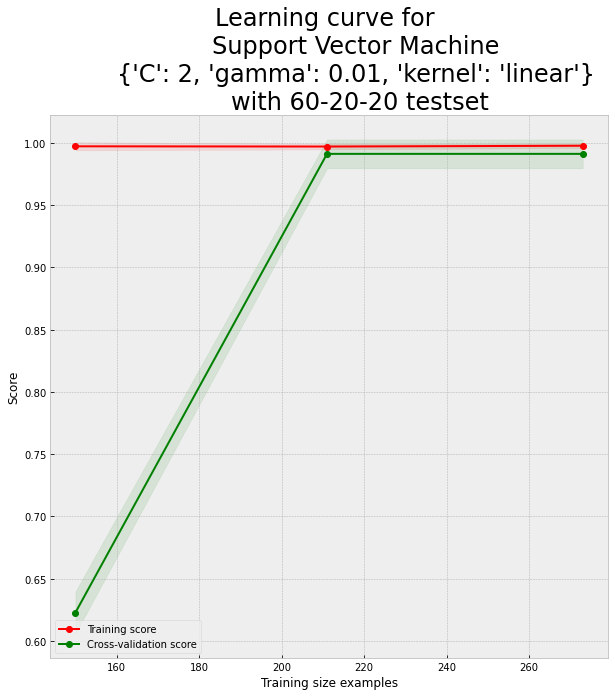

In [67]:
title = "Learning curve for \n\
        Support Vector Machine \n\
        {'C': 2, 'gamma': 0.01, 'kernel': 'linear'} \n\
        with 60-20-20 testset"

plot_graph(title, SVM_622_train_sizes, SVM_622_train_scores622, SVM_622_test_scores622)

In [68]:
#In this graph, as training size grows, the score gows up. 
#However, once it hits around 210 examples, the corss-validation score
#does not gorw.



### test set prediction result on 60-20-20 dataset

In [69]:
y_pred_test622_SVM = SVM_622_CV.predict(X_test622)
test_pred_result = metrics.accuracy_score(y_test622, y_pred_test622_SVM)

print(round(test_pred_result,3))

1.0


In [70]:
test_pred_confusion_matrix = metrics.confusion_matrix(y_test622, y_pred_test622_SVM)
print(test_pred_confusion_matrix)

[[32  0  0]
 [ 0  9  0]
 [ 0  0 27]]


In [71]:
# The accuracy score of the model is 1 which means that that prediction
# is 100% correct with test data set
#As you can see in the matrix is correctly predicted all three species.


### Validation set prediction result on 60-20-20 dataset

In [72]:
y_pred_val622_SVM = SVM_622_CV.predict(X_val622)
val_pred_result = metrics.accuracy_score(y_val622, y_pred_val622_SVM)

print(round(val_pred_result,3))

0.986


In [73]:
val_pred_confusion_matrix = metrics.confusion_matrix(y_val622, y_pred_val622_SVM)
print(val_pred_confusion_matrix)

[[31  1  0]
 [ 0 15  0]
 [ 0  0 22]]


In [74]:
# The accuracy score of the model is 0.986 which means that that prediction
# is 98.6% correct with validation data set
#As you can see in the matrix outputs almsot correct data except
#making one mistake.


### Performance evaluation with Precision, recall, accuracy  and latency

In [75]:
SVM622_model = "Support Vector Machine with 622 dataset"

performance_evaluation(SVM622_model,SVM_622_CV,features, labels)

Support Vector Machine with 622 dataset model performance are the follwoing
Precision score is 0.997
Recall score is 0.997
Accuracy score is 0.997


### Latency performance

In [76]:
print("Latency on gridsearch is {} s".format(round(latency_GridSearch_SVM622,3)))

Latency on gridsearch is 0.101 s


In [77]:
print("Latency on training model is {} s".format(latency_fit_SVM622_2))

Latency on training model is 14.591 s


## 2. Support Vector Machines with 80-10-10 dataset

In [78]:
SVC_811 = SVC()
parameters_SVM = {
    'kernel' : ['linear', 'rbf'],
    'C' : range(2,10),
    'gamma' : [1e-2, 1e-3, 1e-4]
}

# SVM_811_CV = GridSearchCV(SVC_811, parameters, cv = 5)
# SVM_811_CV  = SVM_811_CV .fit(X_train811, y_train811.values.ravel())

# print_results(SVM_811_CV )

In [79]:
#Check the hyper parameter
beg_SVM_811_GridSrachCV = time()
SVM_811_CV = GridSearchCV(SVC_811, parameters_SVM, cv = 5)
end_SVM_811_GridSrachCV = time()

#measure the latency of hyperparameter search
latency_GridSearch_SVM811 = round(((end_SVM_811_GridSrachCV - beg_SVM_811_GridSrachCV)*1000),3)
print(latency_GridSearch_SVM811)


0.093


In [80]:
#train the model with training dataset
beg_SVM_811_fit = time()
SVM_811_CV = SVM_811_CV .fit(X_train811, y_train811.values.ravel())
end_SVM_811_fit = time()

#measure the latency of training the model
latency_fit_SVM811_2 = round(((end_SVM_811_fit - beg_SVM_811_fit)),3)
print(latency_fit_SVM811_2)


12.264


In [81]:
print_results(SVM_811_CV)

BEST PARAMS: {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}, Best Score: 0.9927272727272728

0.993 (+/-0.029) for {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}
0.776 (+/-0.16) for {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.993 (+/-0.029) for {'C': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.78 (+/-0.109) for {'C': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.993 (+/-0.029) for {'C': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.699 (+/-0.068) for {'C': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.029) for {'C': 3, 'gamma': 0.01, 'kernel': 'linear'}
0.776 (+/-0.16) for {'C': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.989 (+/-0.029) for {'C': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.795 (+/-0.122) for {'C': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.029) for {'C': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.732 (+/-0.1) for {'C': 3, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.029) for {'C': 4, 'gamma': 0.01, 'kernel': 'linear'}
0.776 (+/-0.16) for {'C': 4, 'gamma': 0.01, 'kernel': 'rbf'}
0.989 (+/-0.029

### Learning_curve to get training score

In [82]:
SVM_811_train_sizes, SVM_811_train_scores, SVM_811_test_scores = learning_curve(
        SVM_811_CV,
        features,
        labels,
        n_jobs=-1,
           cv=5,
        train_sizes=np.linspace(.1, 1.0, 5),
    )

### Plot a graph for Suppor Vector Machine Model with 80-10-10 dataset

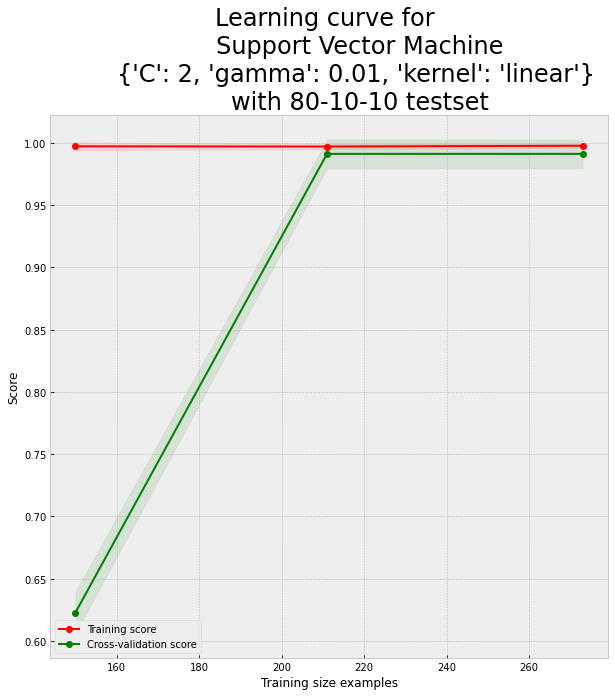

In [83]:
title = "Learning curve for \n\
        Support Vector Machine\n\
        {'C': 2, 'gamma': 0.01, 'kernel': 'linear'} \n\
        with 80-10-10 testset"
plot_graph(title, SVM_811_train_sizes, SVM_811_train_scores, SVM_811_test_scores)

In [84]:
#In this graph, as training size grows, the score gows up. 
#However, once it hits around 210 examples, the corss-validation score
#does not gorw.



### test set prediction result on 80-10-10 dataset

In [85]:
y_predict_test811_SVM = SVM_811_CV.predict(X_test811)
test_pred_result = metrics.accuracy_score(y_test811, y_predict_test811_SVM)

print(round(test_pred_result,3))

0.971


In [86]:
test_pred_confusion_matrix = metrics.confusion_matrix(y_test811, y_predict_test811_SVM)
print(test_pred_confusion_matrix)

[[16  1  0]
 [ 0  7  0]
 [ 0  0 10]]


In [87]:
# The accuracy score of the model is 0.971 which means that that prediction
# is 97.1% correct with test data set
#As you can see in the matrix outputs almsot correct data except
#making one mistake.


### Validation set prediction result on 80-10-10 dataset

In [88]:
y_predict_val811_SVM = SVM_811_CV.predict(X_val811)
val_pred_result = metrics.accuracy_score(y_val811, y_predict_val811_SVM)

print(round(val_pred_result,3))

1.0


In [89]:
val_pred_confusion_matrix = metrics.confusion_matrix(y_val811, y_predict_val811_SVM)
print(val_pred_confusion_matrix)

[[18  0  0]
 [ 0  5  0]
 [ 0  0 12]]


In [90]:
# The accuracy score of the model is 1 which means that that prediction
# is 98.6% correct with validation data set
#As you can see in the matrix outputs 100% correct.


### Performance evaluation with Precision, recall, accuracy and latency

In [91]:
SVM811_model = "Support Vector Machine with 811 dataset"

performance_evaluation(SVM811_model,SVM_811_CV,features, labels)

Support Vector Machine with 811 dataset model performance are the follwoing
Precision score is 0.997
Recall score is 0.997
Accuracy score is 0.997


### Latency performance

In [92]:
print("Latency on gridsearch is {} s".format(round(latency_GridSearch_SVM811,3)))


Latency on gridsearch is 0.093 s


In [93]:
print("Latency on training model is {} s".format(latency_fit_SVM811_2))


Latency on training model is 12.264 s


## 3. Random Forest Classifier with 60-20-20 dataset

### Random Forest Classifier Model Train

In [94]:
RFC_622 = RandomForestClassifier()

parameters_RFC = {
    'n_estimators' : [5,50,250],
    'max_depth' : [2,4,8,16,21,None]
}



In [95]:
#Check the hyper parameter
beg_RFC_622_GridSrachCV = time()
RFC_622_CV = GridSearchCV(RFC_622, parameters_RFC, cv = 5)
end_RFC_622_GridSrachCV = time()

#measure the latency of hyperparameter search
latency_GridSearch_RFC622 = round(((end_RFC_622_GridSrachCV - beg_RFC_622_GridSrachCV)*1000),3)
print(latency_GridSearch_RFC622)


0.081


In [96]:
#train the model with training dataset
beg_RFC_622_fit = time()
RFC_622_CV = RFC_622_CV .fit(X_train622, y_train622.values.ravel())
end_RFC_622_fit = time()

#measure the latency of training the model
latency_fit_RFC622_2 = round(((end_RFC_622_fit - beg_RFC_622_fit)),3)
print(latency_fit_RFC622_2)


8.971


In [97]:
print_results(RFC_622_CV)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 50}, Best Score: 0.9853658536585366

0.941 (+/-0.09) for {'max_depth': 2, 'n_estimators': 5}
0.976 (+/-0.053) for {'max_depth': 2, 'n_estimators': 50}
0.976 (+/-0.031) for {'max_depth': 2, 'n_estimators': 250}
0.98 (+/-0.057) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.044) for {'max_depth': 4, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 4, 'n_estimators': 250}
0.976 (+/-0.031) for {'max_depth': 8, 'n_estimators': 5}
0.985 (+/-0.039) for {'max_depth': 8, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 8, 'n_estimators': 250}
0.966 (+/-0.05) for {'max_depth': 16, 'n_estimators': 5}
0.985 (+/-0.024) for {'max_depth': 16, 'n_estimators': 50}
0.985 (+/-0.024) for {'max_depth': 16, 'n_estimators': 250}
0.956 (+/-0.078) for {'max_depth': 21, 'n_estimators': 5}
0.985 (+/-0.024) for {'max_depth': 21, 'n_estimators': 50}
0.985 (+/-0.024) for {'max_depth': 21, 'n_estimators': 250}
0.971 (+/-0.037) for {'max_depth': None, 'n_es

### Learning_curve to evaluate training score

In [98]:
RFC_622_train_sizes, RFC_622_train_score, RFC_622_test_score = learning_curve(
                                                                        RFC_622_CV,
                                                                        features,
                                                                        labels,
                                                                        n_jobs = -1,
                                                                        cv = 5,
                                                                        train_sizes = np.linspace(.1, 1.0,5)
                                                                                )

### Plot a graph for Randome Forest Classifier Model with 60-20-20 dataset

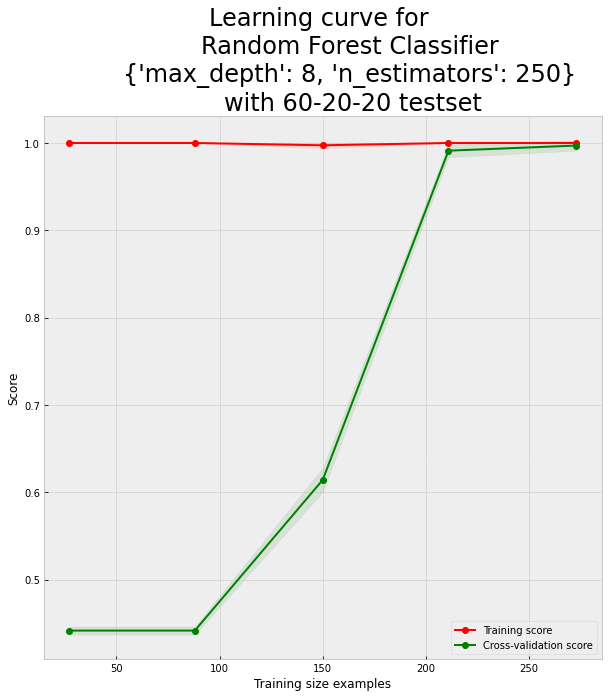

In [99]:
title = "Learning curve for \n\
        Random Forest Classifier \n\
        {'max_depth': 8, 'n_estimators': 250} \n\
        with 60-20-20 testset"

plot_graph(title, RFC_622_train_sizes, RFC_622_train_score, RFC_622_test_score)



In [100]:
#In this graph, as training size grows, the score gows up. 
#it does not grow untill the training size of around 90.
#However, after it reaches that point it starts to grow.
#After that it grows steadily till it meets 150 of training size
#Once it has more than 150 sizes, the growth slope becomes steeper which
#means its cross-validation score is getting better in faster rate.
#however, once it reaches around 210, it does not grow any more.



### test set prediction result on 60-20-20 dataset

In [101]:
y_pred_test622_RFCModel = RFC_622_CV.predict(X_test622)
test_prediction_result_RFCModel = metrics.accuracy_score(y_test622, y_pred_test622_RFCModel)

print(round(test_prediction_result_RFCModel,3))

0.971


In [102]:
test_pred_conf_matrix_RFC622 = metrics.confusion_matrix(y_test622,
                                                         y_pred_test622_RFCModel)


print(test_pred_conf_matrix_RFC622)

[[30  2  0]
 [ 0  9  0]
 [ 0  0 27]]


In [103]:
# The accuracy score of the model is 0.985 which means that that prediction
# is 98.5% correct with testing data set
#As you can see in the matrix outputs almsot correct data except
#making one mistake.


### Validation set prediction result on 60-20-20 dataset

In [104]:
y_pred_val622_RFCModel = RFC_622_CV.predict(X_val622)
val_pred_result_RFC = accuracy_score(y_val622, y_pred_val622_RFCModel)

print(round(val_pred_result_RFC,3))


0.971


In [105]:
val_pred_conf_matrix_RFC622 = metrics.confusion_matrix(y_val622,
                                                         y_pred_val622_RFCModel)


print(val_pred_conf_matrix_RFC622)

[[30  2  0]
 [ 0 15  0]
 [ 0  0 22]]


In [106]:
# The accuracy score of the model is 0.971 which means that that prediction
# is 98.6% correct with validation data set
#As you can see in the matrix outputs almsot correct data except
#making two mistakes.


### Performance evaluation with Precision, recall, accuracy and latency

In [107]:
RFC622_model = "Random Forest Classifier with 622 dataset"

performance_evaluation(RFC622_model,RFC_622_CV,features, labels)

Random Forest Classifier with 622 dataset model performance are the follwoing
Precision score is 0.988
Recall score is 0.988
Accuracy score is 0.988


### Latency performance

In [108]:
print("Latency on gridsearch is {} s".format(round(latency_GridSearch_RFC622 * 1000)))


Latency on gridsearch is 81 s


In [109]:
print("Latency on training model is {} s".format(latency_fit_RFC622_2))

Latency on training model is 8.971 s


## 4. Random Forest Classifier with 80-10-10 dataset

### Random Forest Classifier Model Train

In [110]:
RFC_811 = RandomForestClassifier()

parameters_RFC = {
    'n_estimators' : [5,50,250],
    'max_depth' : [2,4,8,16,21,None]
}

In [111]:
# 
beg_RFC_811_GridSrachCV = time()
RFC_811_CV = GridSearchCV(RFC_811, parameters_RFC, cv = 5)
end_RFC_811_GridSrachCV = time()


latency_GridSearch_RFC811 = round(((end_RFC_811_GridSrachCV - beg_RFC_811_GridSrachCV)*1000),3)
print(latency_GridSearch_RFC811)


0.099


In [112]:
#train the model with training dataset
beg_RFC_811_fit = time()
RFC_811_CV = RFC_811_CV .fit(X_train811, y_train811.values.ravel())
end_RFC_811_fit = time()

#measure the latency of training the model
latency_fit_RFC811_2 = round(((end_RFC_811_fit - beg_RFC_811_fit)),3)
print(latency_fit_RFC811_2)


8.934


In [113]:
print_results(RFC_811_CV)

BEST PARAMS: {'max_depth': 21, 'n_estimators': 250}, Best Score: 0.9927272727272728

0.974 (+/-0.029) for {'max_depth': 2, 'n_estimators': 5}
0.974 (+/-0.018) for {'max_depth': 2, 'n_estimators': 50}
0.978 (+/-0.015) for {'max_depth': 2, 'n_estimators': 250}
0.982 (+/-0.023) for {'max_depth': 4, 'n_estimators': 5}
0.978 (+/-0.015) for {'max_depth': 4, 'n_estimators': 50}
0.982 (+/-0.0) for {'max_depth': 4, 'n_estimators': 250}
0.974 (+/-0.029) for {'max_depth': 8, 'n_estimators': 5}
0.985 (+/-0.015) for {'max_depth': 8, 'n_estimators': 50}
0.989 (+/-0.018) for {'max_depth': 8, 'n_estimators': 250}
0.978 (+/-0.015) for {'max_depth': 16, 'n_estimators': 5}
0.985 (+/-0.015) for {'max_depth': 16, 'n_estimators': 50}
0.989 (+/-0.018) for {'max_depth': 16, 'n_estimators': 250}
0.982 (+/-0.023) for {'max_depth': 21, 'n_estimators': 5}
0.989 (+/-0.018) for {'max_depth': 21, 'n_estimators': 50}
0.993 (+/-0.018) for {'max_depth': 21, 'n_estimators': 250}
0.974 (+/-0.05) for {'max_depth': None, '

### Learning_curve to get training score

In [114]:
RFC_811_train_sizes, RFC_811_train_score, RFC_811_test_score = learning_curve(
                                                                        RFC_811_CV,
                                                                        features,
                                                                        labels,
                                                                        n_jobs = -1,
                                                                        cv = 5,
                                                                        train_sizes = np.linspace(.1, 1.0,5)
                                                                                )

### Plot a graph for Randome Forest Classifier Model with 80-10-10 dataset

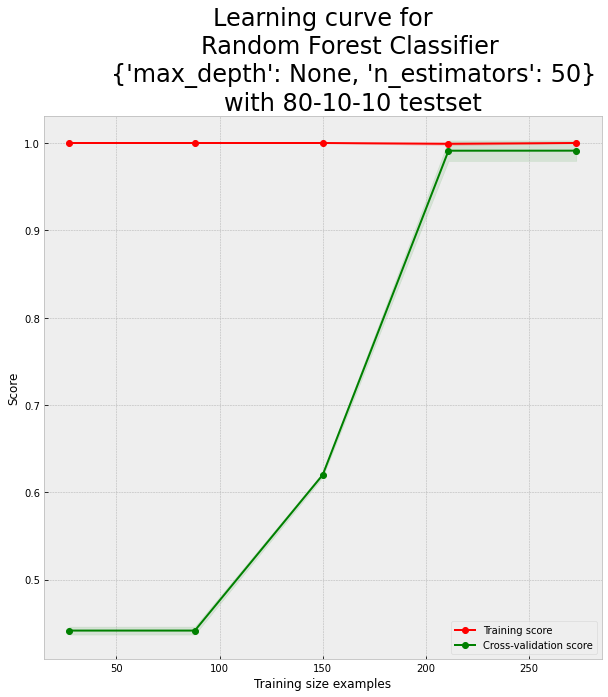

In [115]:
title = "Learning curve for\n\
        Random Forest Classifier \n\
        {'max_depth': None, 'n_estimators': 50}\n\
        with 80-10-10 testset"

plot_graph(title,RFC_811_train_sizes, RFC_811_train_score, RFC_811_test_score)



In [116]:
#In this graph, as training size grows, the score gows up. 
#it does not grow untill the training size of around 90.
#However, after it reaches that point it starts to grow.
#After that it grows steadily till it meets 150 of training size
#Once it has more than 150 sizes, the growth slope becomes steeper which
#means its cross-validation score is getting better in faster rate.
#however, once it reaches around 210, it does not grow any more.



### test set prediction result on 60-20-20 dataset

In [117]:
y_pred_test811_RFCModel = RFC_811_CV.predict(X_test811)
test_prediction_result_RFCModel = metrics.accuracy_score(y_test811, y_pred_test811_RFCModel)

print(round(test_prediction_result_RFCModel,3))

0.941


In [118]:
test_pred_conf_matrix_RFC622 = metrics.confusion_matrix(y_test811,
                                                         y_pred_test811_RFCModel)


print(test_pred_conf_matrix_RFC622)

[[15  2  0]
 [ 0  7  0]
 [ 0  0 10]]


In [119]:
# The accuracy score of the model is 0.971 which means that that prediction
# is 97.1% correct with testing data set
#As you can see in the matrix outputs almsot correct data except
#making one mistake.


### Validation set prediction result on 80-10-10 dataset

In [120]:
y_pred_val811_RFCModel = RFC_811_CV.predict(X_val811)
val_pred_result_RFC = accuracy_score(y_val811, y_pred_val811_RFCModel)

print(round(val_pred_result_RFC,3))


1.0


In [121]:
val_pred_conf_matrix_RFC811 = metrics.confusion_matrix(y_val811,
                                                         y_pred_val811_RFCModel)


print(val_pred_conf_matrix_RFC811)

[[18  0  0]
 [ 0  5  0]
 [ 0  0 12]]


In [122]:
# The accuracy score of the model is 1 which means that that prediction
# is 100% correct with validation data set
#As you can see in the matrix outputs correct values.

### Performance evaluation with Precision, recall, accuracy and latency

In [123]:
RFC811_model = "Random Forest Classifier with 811 dataset"

performance_evaluation(RFC811_model,RFC_811_CV,features, labels)

Random Forest Classifier with 811 dataset model performance are the follwoing
Precision score is 0.994
Recall score is 0.994
Accuracy score is 0.994


### Latency performance

In [124]:
print("Latency on gridsearch is {} ms".format(round(latency_GridSearch_RFC811 * 1000)))


Latency on gridsearch is 99 ms


In [125]:
print("Latency on training model is {} s".format(latency_fit_RFC811_2))


Latency on training model is 8.934 s


## 5. Multi-layer Percenptrons 60-20-20 dataset

In [126]:
MLP_622 = MLPClassifier()

parameters_MLP = {
    'hidden_layer_sizes' : [(50,50,50), (50,100,50), (100,100,100)],
    'activation' : ['relu', 'tanh', 'logistic'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
    
}


In [127]:
#Check the hyper parameter
beg_MLP_622_GridSrachCV = time()
MLP_622_CV = GridSearchCV(MLP_622, parameters_MLP, cv = 5)
end_MLP_622_GridSrachCV = time()


latency_GridSearch_MLP622 = round(((end_MLP_622_GridSrachCV - beg_MLP_622_GridSrachCV)*1000),3)
print(latency_GridSearch_MLP622)


0.082


In [128]:
#train the model with training dataset
beg_MLP_622_fit = time()
MLP_622_CV = MLP_622_CV .fit(X_train622, y_train622.values.ravel())
end_MLP_622_fit = time()

#measure the latency of training the model
latency_fit_MLP622_2 = round(((end_MLP_622_fit - beg_MLP_622_fit)),3)
print(latency_fit_MLP622_2)



8.916


In [129]:
print_results(MLP_622_CV)

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive'}, Best Score: 0.6731707317073171

0.298 (+/-0.215) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant'}
0.371 (+/-0.17) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'invscaling'}
0.371 (+/-0.287) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive'}
0.4 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant'}
0.424 (+/-0.11) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'invscaling'}
0.4 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive'}
0.376 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant'}
0.371 (+/-0.17) for {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_ra

### Learning_curve to evaluate training score

In [130]:
MLP_622_train_sizes, MLP_622_train_score, MLP_622_test_score = learning_curve(
                                                                        MLP_622_CV,
                                                                        features,
                                                                        labels,
                                                                        n_jobs = -1,
                                                                        cv = 5,
                                                                        train_sizes = np.linspace(.1, 1.0,5)
                                                                                )

### Plot a graph for Multilayer Percentron Model with 6-2-2 dataset

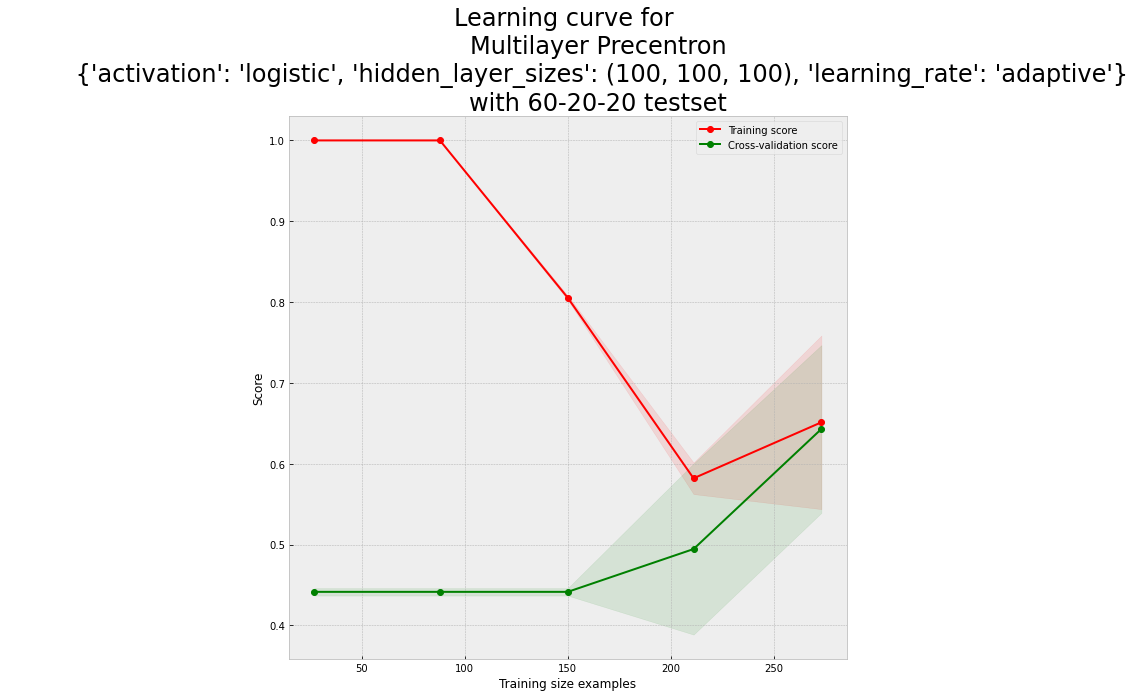

In [131]:
title = "Learning curve for \n\
        Multilayer Precentron\n \
        {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive'}\n\
        with 60-20-20 testset"

plot_graph(title, MLP_622_train_sizes, MLP_622_train_score, MLP_622_test_score)



In [132]:
#In MLP, training score goes down once it hits 80 training examples. 
# It drops significantly till training size of around 210. and then it gets reduce
#in less speed(lower degree).
# In cross-validation score, it goes up slowly. however, there is a range between size of
#150 to around 210 where it goes down. 
#Though it goes down in certain range, it goes up again after it hits size of 210.

### test set prediction result on 60-20-20 dataset

In [133]:
y_pred_test622_MLP = MLP_622_CV.predict(X_test622)
test_pred_result = metrics.accuracy_score(y_test622, y_pred_test622_MLP)

print(round(test_pred_result,3))

0.471


In [134]:
test_pred_confusion_matrix = metrics.confusion_matrix(y_test622, y_pred_test622_MLP)
print(test_pred_confusion_matrix)

[[32  0  0]
 [ 9  0  0]
 [27  0  0]]


In [135]:
# The accuracy score of the model is 0.471 which means that that prediction
# is 47.1% correct with validation data set
#As you can see in the matrix, the model made alot of mistakes. 
#It just predicts into only one specie. This seems to be cuased by 
#the model. The MPL model requires alot of data where in this case is not.
#Thus, not having enough data seems to cuase such low score.


### Validation set prediction result on 60-20-20 dataset¶

In [136]:
y_pred_val622_MLP = MLP_622_CV.predict(X_val622)
val_pred_result = metrics.accuracy_score(y_val622, y_pred_val622_MLP)

print(round(val_pred_result,3))

0.464


In [137]:
val_pred_confusion_matrix = metrics.confusion_matrix(y_val622, y_pred_val622_MLP)
print(val_pred_confusion_matrix)

[[32  0  0]
 [15  0  0]
 [22  0  0]]


In [138]:
# The accuracy score of the model is 0.464 which means that that prediction
# is 46.4% correct with validation data set
#As you can see in the matrix, the model made alot of mistakes. 
#It just predicts into only one specie. This seems to be cuased by 
#the model. The MPL model requires alot of data where in this case is not.
#Thus, not having enough data seems to cuase such low score.


### Performance evaluation with Precision, Recall, Accuracy and Latency

In [139]:
SVM622_model = "Multilayer Perceptron with 622 dataset"

performance_evaluation(SVM622_model,MLP_622_CV,features, labels)

Multilayer Perceptron with 622 dataset model performance are the follwoing
Precision score is 0.442
Recall score is 0.442
Accuracy score is 0.442


### Latency performance

In [140]:
print("Latency on gridsearch is {} s".format(round(latency_GridSearch_MLP622,3 )))

Latency on gridsearch is 0.082 s


In [141]:
print("Latency on training model is {} s".format(latency_fit_MLP622_2))

Latency on training model is 8.916 s


## 6. Multi-layer Percenptrons 80-10-10 dataset

### Multilayer Preceptron Model Train

In [142]:
MLP_811 = MLPClassifier()

parameters_MLP = {
    'hidden_layer_sizes' : [(50,50,50), (50,100,50), (100,100,100)],
    'activation' : ['relu', 'tanh', 'logistic'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
    
}


In [143]:
#Check the hyper parameter
beg_MLP_811_GridSrachCV = time()
MLP_811_CV = GridSearchCV(MLP_811, parameters_MLP, cv = 5)
end_MLP_811_GridSrachCV = time()

#measure the latency of hyperparameter search
latency_GridSearch_MLP811 = round(((end_MLP_811_GridSrachCV - beg_MLP_811_GridSrachCV)*1000),3)
print(latency_GridSearch_MLP811)


0.084


In [144]:
#train the model with training dataset
beg_MLP_811_fit = time()
MLP_811_CV = MLP_811_CV .fit(X_train622, y_train622.values.ravel())
end_MLP_811_fit = time()

#measure the latency of training the model
latency_fit_MLP811_2 = round(((end_MLP_811_fit - beg_MLP_811_fit)),3)
print(latency_fit_MLP811_2)


9.367


In [145]:
print_results(MLP_811_CV)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant'}, Best Score: 0.702439024390244

0.361 (+/-0.164) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant'}
0.38 (+/-0.085) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'invscaling'}
0.371 (+/-0.048) for {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive'}
0.327 (+/-0.201) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant'}
0.376 (+/-0.165) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'invscaling'}
0.38 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive'}
0.385 (+/-0.048) for {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant'}
0.307 (+/-0.215) for {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_

### Learning_curve to get training score

In [146]:
MLP_811_train_sizes, MLP_811_train_scores622, MLP_811_test_scores622 = learning_curve(
        MLP_811_CV,
        features,
        labels,
        n_jobs=-1,
           cv=5,
        train_sizes=np.linspace(.1, 1.0, 5),
    )

### Plot a graph for Multilayer perceptron with 80-10-10 dataset

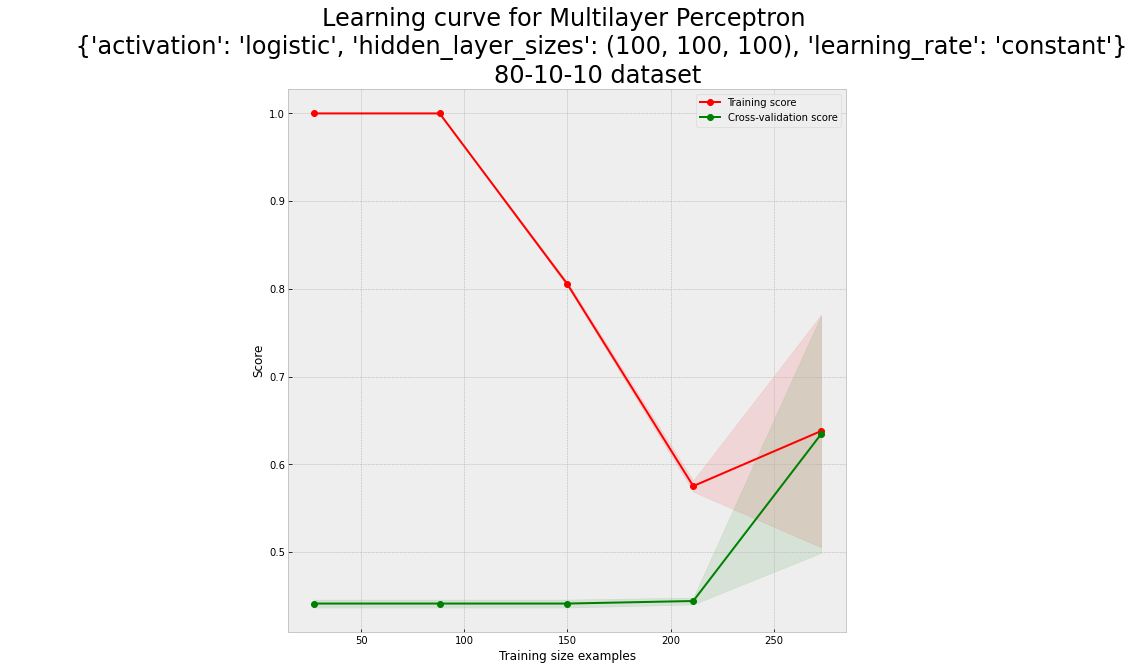

In [147]:
title = "Learning curve for Multilayer Perceptron \n \
        {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant'}\n\
        80-10-10 dataset"

plot_graph(title,MLP_811_train_sizes, MLP_811_train_scores622, MLP_811_test_scores622)

In [148]:
#In MLP, training score goes down once it hits 80 training examples. 
# It drops significantly till training size of around 250.
#There are three different sections where it changes its degrees.
#1) from size of 90 to 150
#2) from size of 150 to 210
#3) from size of 210 to 280.

#2nd section drops most significantly.
#1st and 3rd section drops significantly.

# The cross validation score can be seperated into three sections too
#1) from size of 90 to 150
#2) from size of 150 to 210
#3) from size of 210 to 280.

#In the first section, the score slowly goes up with high std. 
#In the second section, the score drops a bit. It is not significant. 
#In the third section, the score drops as well, but it is steeper than second section.

#This seems to be caused by not enough training data size.

### test set prediction result on 80-10-10 dataset

In [149]:
y_pred_test811_MLP = MLP_811_CV.predict(X_test811)
test_pred_result = metrics.accuracy_score(y_test811, y_pred_test811_MLP)

print(round(test_pred_result,3))

0.618


In [150]:
test_pred_confusion_matrix = metrics.confusion_matrix(y_test811, y_pred_test811_MLP)
print(val_pred_confusion_matrix)

[[32  0  0]
 [15  0  0]
 [22  0  0]]


In [151]:
# The accuracy score of the model is 0.382 which means that that prediction
# is 38.2% correct with validation data set
#As you can see in the matrix, the model made alot of mistakes. 
#The MPL model requires alot of data where in this case is not.
#Thus, not having enough data seems to cuase such low score.


### Validation set prediction result on 80-10-10 dataset

In [152]:
y_pred_val811_MLP = MLP_811_CV.predict(X_val811)
val_pred_result = metrics.accuracy_score(y_val811, y_pred_val811_MLP)

print(round(val_pred_result,3))

0.657


In [153]:
val_pred_confusion_matrix = metrics.confusion_matrix(y_val811, y_pred_val811_MLP)
print(val_pred_confusion_matrix)

[[17  0  1]
 [ 5  0  0]
 [ 6  0  6]]


In [154]:
# The accuracy score of the model is 0.4 which means that that prediction
# is 40% correct with validation data set
#As you can see in the matrix, the model made alot of mistakes. 
#The MPL model requires alot of data where in this case is not.
#Thus, not having enough data seems to cuase such low score.


### Performance evaluation with Precision, recall, accuracy and latency

In [155]:
MLP811_model = "Multilayer Preceptron with 811 dataset"

performance_evaluation(MLP811_model,MLP_811_CV,features, labels)

Multilayer Preceptron with 811 dataset model performance are the follwoing
Precision score is 0.582
Recall score is 0.582
Accuracy score is 0.582


### Latency performance

In [156]:
print("Latency on gridsearch is {} ms".format(round(latency_GridSearch_MLP811 * 1000)))

Latency on gridsearch is 84 ms


In [157]:
print("Latency on training model is {} s".format(latency_fit_MLP811_2))

Latency on training model is 9.367 s


### The best model evaluation

In [158]:
title_sum_table = ['SVM 60-20-20', 'SVM 80-10-10', 
                   'RFC 60-20-20', 'RFC 80-10-10',
                   'MLP 60-20-20', 'MLP 80-10-10']

Gridsearch_latency = [0.244, 0.161, 0.99, 0.102, 0.102, 0.1]

fit_latency = [24.087, 20.7, 15.425, 14.826, 16.052, 16.568]

test_set_pred_score = [1,0.971, 0.971, 1, 0.706, 0.5]

val_test_pred_score = [0.986,1,0.971,1,0.565,0.514]

Prec_score  = [0.997,0.997,0.988,1,0.617,0.442]
Rec_score = [0.997,0.997,0.988,1,0.617,0.442]
Acc_score = [0.997,0.997,0.988,1,0.617,0.442]

List_t = list(zip(title_sum_table, Gridsearch_latency,fit_latency,
                  test_set_pred_score,val_test_pred_score,
                  Prec_score,Rec_score,Acc_score))

df = pd.DataFrame(List_t,
                  columns = ['Model_type_Ratio', 
                             'GridSearch_Latency','Fit Latency',
                             'Test_set_prediction_score',
                             'Validation_set_prediction_score',
                             'Precision_score','Recall_score','Accuracy_score'])
print(df)

  Model_type_Ratio  GridSearch_Latency  Fit Latency  \
0     SVM 60-20-20               0.244       24.087   
1     SVM 80-10-10               0.161       20.700   
2     RFC 60-20-20               0.990       15.425   
3     RFC 80-10-10               0.102       14.826   
4     MLP 60-20-20               0.102       16.052   
5     MLP 80-10-10               0.100       16.568   

   Test_set_prediction_score  Validation_set_prediction_score  \
0                      1.000                            0.986   
1                      0.971                            1.000   
2                      0.971                            0.971   
3                      1.000                            1.000   
4                      0.706                            0.565   
5                      0.500                            0.514   

   Precision_score  Recall_score  Accuracy_score  
0            0.997         0.997           0.997  
1            0.997         0.997           0.997  
2    

The table above shows latency, prediction scores and evaluation score(Precision, Recall and Accuracy) of each model with different data ration.

Before we started to talk about all these evaluations, we must acknowledge that there are many different types of models and hyperparameters setting that could have better latency and performace. Therefore, this evaluation is very limited due to time and hardware constraints.

Firstly, bot MLP model with ration of 60-20-20 and 80-10-10 have very low evaluation score. Thus, it seems bit inappropriate to apply the model to predict specieis.

This is caused by low training data size. As I have mentioned earlier, the total data set is considered to be very small data set. Though the other two models performed very well, the MLP model usually requires bigger dataset to perform well. Therefore, it makes sense that MLP has very low scores compare to the other two. 

We are just predicting species of penguins which is not considered to be a mission-critical. However, if this is detecting cancer cell or critical illness, those scores can make several effect on one's life. Therefore, this model does not seem to an appropriate model given its variables. One thing we must acknowled is that in the case of mission critical prediction, we will have much bigger and cleaner dataset to acheive higher evaluation scores.

Now, there are two options left for us compare.


In [159]:
title_sum_table = ['SVM 60-20-20', 'SVM 80-10-10', 
                   'RFC 60-20-20', 'RFC 80-10-10'
                  ]

Gridsearch_latency = [0.244, 0.161, 0.99, 0.102]

fit_latency = [24.087, 20.7, 15.425, 14.826]

test_set_pred_score = [1,0.971, 0.971, 1]

val_test_pred_score = [0.986,1,0.971,1]

Prec_score  = [0.997,0.997,0.988,1]
Rec_score = [0.997,0.997,0.988,1]
Acc_score = [0.997,0.997,0.988,1]

List_t = list(zip(title_sum_table, Gridsearch_latency,fit_latency,
                  test_set_pred_score,val_test_pred_score,
                  Prec_score,Rec_score,Acc_score))

df2 = pd.DataFrame(List_t,
                  columns = ['Model_type_Ratio', 
                             'GridSearch_Latency','Fit Latency',
                             'Test_set_prediction_score',
                             'Validation_set_prediction_score',
                             'Precision_score','Recall_score','Accuracy_score'])
print(df2)

  Model_type_Ratio  GridSearch_Latency  Fit Latency  \
0     SVM 60-20-20               0.244       24.087   
1     SVM 80-10-10               0.161       20.700   
2     RFC 60-20-20               0.990       15.425   
3     RFC 80-10-10               0.102       14.826   

   Test_set_prediction_score  Validation_set_prediction_score  \
0                      1.000                            0.986   
1                      0.971                            1.000   
2                      0.971                            0.971   
3                      1.000                            1.000   

   Precision_score  Recall_score  Accuracy_score  
0            0.997         0.997           0.997  
1            0.997         0.997           0.997  
2            0.988         0.988           0.988  
3            1.000         1.000           1.000  


In the second table given above, I removed MLP model. So that it would be eaiser for reader to see the whole dataset.

Both model with both ration have really good prediction scores and evaluation scores.

The best model is Randome Forest Model with 80-10-10 dataset ration.
It has the perfect prediction scores and evaluation scores. 
Also, it has really good Gridsearch_latency and Fit_latency. Since Latency is time measured to finish the execution, lower is better.

The model trained with Random Forest Classifier with 80-10-10 dataset has the best evaluation socres and low lateny on gridsearch and fit. 

Therefore, based on this table, Random Forest Model with 80-10-10 would perform the best among other models.

